# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background:
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions:

In this exercise, you will:

1. critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
2. construct a statistically sound analysis and make recommendations of your own
3. More nsructions after preliminary analysis:
    1. Setup an appropriate hypothesis test.
    2. Compute and report the observed significance value (or p-value).
    3. Report statistical significance for $\\alpha$ = .01.
    4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?\n',
    5. Look at the scatterplot above. 
    '      - What are the advantages and disadvantages of using this plot to convey information?
    '      - Construct another plot that conveys the same information in a more direct manner.

### Resources:

[Data source:](https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3)

[More information:](http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html)

[Markdown syntax:]( http://nestacms.com/docs/creating-content/markdown-cheat-sheet)


In [15]:
import numpy as np
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats


## Preliminary Analysis:

In [16]:
hospital_read_df = pd.read_csv('D:/sr/1508961248_hospital_readmit/hospital_readmit/data/cms_hospital_readmissions.csv')
hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


In [17]:
# delete missing and inconvenient portions of data ',
clean_hospital_rea_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df = clean_hospital_rea_df.copy()
clean_hospital_read_df.loc[:,'Number of Discharges'] =clean_hospital_read_df['Number of Discharges'].astype(str).astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')


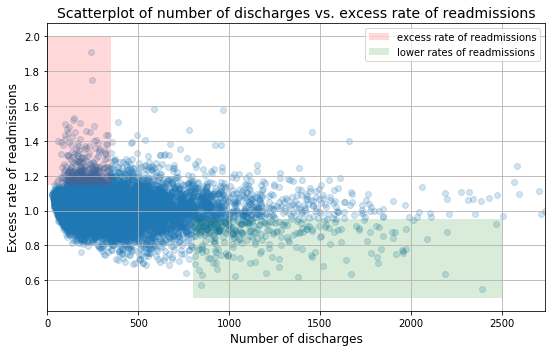

In [18]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', label = "excess rate of readmissions", alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green',label = 'lower rates of readmissions', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.legend()
ax.grid(True)
fig.tight_layout()


## Preliminary Report( as provided in the exercises):

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

##### A. Initial observations based on the plot above

> Overall, rate of readmissions is trending down with increasing number of discharges

> With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

> With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

##### B. Statistics

> In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

> In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

##### C. Conclusions

> There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
> Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

##### D. Regulatory policy recommendations

> Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

> Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


In [19]:
df = clean_hospital_read_df.copy()
print(df.columns)
df.shape

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')


(11578, 12)

### QUESTION 1: Do you agree with the above analysis and recommendations? Why or why not?

##### Solution:

No, I do not agree with the preliminary report since proper statistical analysis was not conducted and it was purely based on intuitive guess.
Let's analyze their claims:

In [20]:
"""A. Initial observations based on the plot above"""
# claim: Overall, rate of readmissions is trending down with increasing number of discharges 
"""The correlation should be negative based on the claim since one(x) goes up and the other(y) goes down"""
# Clearing entries with missing values
df = df[np.logical_not(df['Number of Discharges'].isnull())]
df = df[np.logical_not(df['Number of Readmissions'].isnull())]
df = df[np.logical_not(df['Excess Readmission Ratio'].isnull())]
df = df[np.logical_not(df['Excess Readmission Ratio'].isnull())]
print(df.shape)
#Calculate pearson coefficient to see if the relationship is positive or negative
def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]
    
"""Compute Pearson correlation coefficient between two arrays."""
# Compute correlation matrix: corr_mat
p_r = pearson_r(df['Number of Discharges'], df['Number of Readmissions'])
if p_r > 0:
    print("Overall, rate of readmissions is trending down with increasing number of discharges is not valid claim")
else:
    print("Valid claim: Overall, rate of readmissions is trending down with increasing number of discharges")
    
#Claim:With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
"""The correlation should be negative based on the claim since one(x) goes up and the other(y) goes down"""
p_r2 = pearson_r(df['Number of Discharges'], df['Excess Readmission Ratio'])
if p_r2 > 0:
    print("With lower number of discharges, there is a greater incidence of excess rate of readmissions is an Invalid claim since Pearson correlation >0 ")
else:
    print("With lower number of discharges, there is a greater incidence of excess rate of readmissions is a valid claim")

#Claim: With higher number of discharges, there is a greater incidence of lower rates of readmissions
"""The correlation should be negative based on the claim since one(x) goes up and the other(y) goes down"""
if p_r > 0:
    print("With higher number of discharges, there is a greater incidence of lower rates of readmissions is not a valid claim")
else:
    print("invalid claim")

(11497, 12)
Overall, rate of readmissions is trending down with increasing number of discharges is not valid claim
With lower number of discharges, there is a greater incidence of excess rate of readmissions is a valid claim
With higher number of discharges, there is a greater incidence of lower rates of readmissions is not a valid claim


In [21]:
"""B. Statistics"""
#Claim: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
# subset the data
less_than_100 = df[df['Number of Discharges'] < 100]

# the mean rate
print('Mean excess readmission rate: ', round(less_than_100['Excess Readmission Ratio'].mean(), 3))

# what percentage of the hospitals
print('Excess readmission rate greater than 1 with facilities with number of discharges < 100 :', round((len(less_than_100[less_than_100['Excess Readmission Ratio'] > 1]) / len(less_than_100)) * 100, 3), '%')

#Claim: In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate
#greater than 1
# Create a subset of the data
greater_than_1000 = df[df['Number of Discharges'] > 1000]

# mean rate
print('Mean excess readmission rate: ', round(greater_than_1000['Excess Readmission Ratio'].mean(), 3))

# and the percentage in the excess range
print('Excess readmission rate greater than 1 with facilities with number of discharges > 1000 :', round((len(greater_than_1000[greater_than_1000['Excess Readmission Ratio'] > 1]) / len(greater_than_1000)) * 100, 3), '%')

Mean excess readmission rate:  1.023
Excess readmission rate greater than 1 with facilities with number of discharges < 100 : 63.215 %
Mean excess readmission rate:  0.978
Excess readmission rate greater than 1 with facilities with number of discharges > 1000 : 44.492 %


Both these Statistics claims seem to be true as it can be see from the calculations above

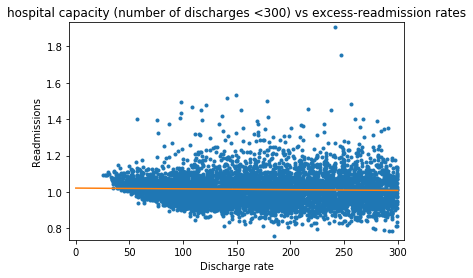

slope = -4.30815456597209e-05
intercept = 1.0215408656750873
The Pearson correlation coefficient: -0.03648871325248188
The p-value of a two-tailed test: 0.004343228006421686
It is clear that the last plot is perfectly flat, with almost zero slope. This represents no linear relationship between variables.
The null hypothesis that there is significant correlation between variables can be rejected since the p-value is so small that it is statistically significant.
There is no significant correlation between hospital capacity (number of discharges) and readmission rates


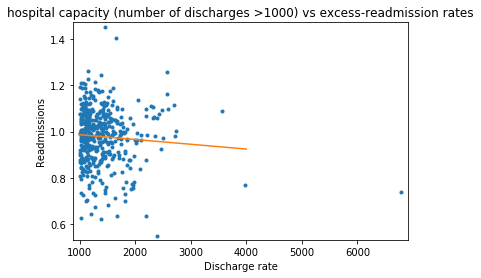

The Pearson correlation coefficient: -0.03648871325248188
The p-value of a two-tailed test: 0.004343228006421686
slope = -2.0722239748078543e-05
intercept = 1.0070031405164523
There is no significant correlation between hospital capacity (number of discharges) and readmission rates
The null hypothesis  that there is significant correlation between variables can be rejected since the p-value is so small that it is statistically significant.


In [22]:
# Claim: There is a significant correlation between hospital capacity (number of discharges) and readmission rates. Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
# Compute correlation matrix: corr_mat

    
"""We will assume that Number of Discharges is a linear function of excess rate of readmissions . That is, f=ai+b, where a is the slope and b is the
intercept. We can think of the intercept as the minimal frate of readmission, probably somewhere between one and two. The slope tells us how
the  rate of readmissions varies with Number of Discharges. We can find the best fit line using np.polyfit(). Plot the data and the best fit 
line. Print out the slope and intercept. """

low = df[df['Number of Discharges'] < 300]

high = df[df['Number of Discharges'] > 1000]

med = df[(df['Number of Discharges'] >300) & (df['Number of Discharges'] <1000)]

x_low, y_low = low['Number of Discharges'], low['Excess Readmission Ratio']

x_med, y_med = med['Number of Discharges'], med['Excess Readmission Ratio']

x_high, y_high = high['Number of Discharges'], high['Excess Readmission Ratio']

p_r = pearson_r(x_low,y_low)

# Plot the Number of Discharges vs rate of readmissions
_ = plt.plot(x_low, y_low,marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Discharge rate')
_ = plt.ylabel('Readmissions')

# Perform a linear regression using np.polyfit(): a, b'Excess Readmission Ratio'
a, b = np.polyfit( x_low, y_low,1)


# Make theoretical line to plot
x = np.array([0,300])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

_= plt.title("hospital capacity (number of discharges <300) vs excess-readmission rates")

# Draw the plot
plt.show()
# Print the results to the screen
print('slope =', a)
print('intercept =', b)

corr = stats.pearsonr(x_low,y_low)
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))
if a<= 0:
    print("It is clear that the last plot is perfectly flat, with almost zero slope. This represents no linear relationship between variables.")
else:
    pass

"significance level (alpha) is 0.01"
alpha = 0.01
if corr[1] < alpha:
    print("The null hypothesis that there is significant correlation between variables can be rejected since the p-value is so small that it is statistically significant.")
else:
    print("The null hypothesis  that there is significant correlation between variables  cannot be rejected")
    
p_r = pearson_r(x_high,y_high)
if p_r > 0:
    print("There is a significant correlation between hospital capacity (number of discharges) and readmission rates")
else:
    print("There is no significant correlation between hospital capacity (number of discharges) and readmission rates")
# Plot the Number of Discharges vs rate of readmissions
_ = plt.plot(x_high, y_high,marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Discharge rate')
_ = plt.ylabel('Readmissions')

# Perform a linear regression using np.polyfit(): a, b'Excess Readmission Ratio'
a, b = np.polyfit( x_high, y_high,1)



# Make theoretical line to plot
x = np.array([1000,4000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

_= plt.title("hospital capacity (number of discharges >1000) vs excess-readmission rates")

# Draw the plot
plt.show()

corr = stats.pearsonr(x_low,y_low)
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))
# Print the results to the screen
print('slope =', a)
print('intercept =', b)
"significance level (alpha) is 0.01"
if p_r > 0:
    print("There is a significant correlation between hospital capacity (number of discharges) and readmission rates")
else:
    print("There is no significant correlation between hospital capacity (number of discharges) and readmission rates")
alpha = 0.01
if corr[1] < alpha:
    print("The null hypothesis  that there is significant correlation between variables can be rejected since the p-value is so small that it is statistically significant.")
else:
    print("The null hypothesis  that there is significant correlation between variables cannot be rejected")





####  Quetion 3: After preliminary analysis:
    A: Setup an appropriate hypothesis test.
    B: Compute and report the observed significance value (or p-value).
    C: Report statistical significance for  𝑎𝑙𝑝ℎ𝑎  = .01.
    D: Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
    
###### Solution:
To do this analysis, we can use the two-sample bootstrap sampling test of the difference in means. At the 99% confidence level, our hypothesis test would be:

 Ho(Null Hypothesis): excess readmission rates in smaller capacities( those with discharges  < 300 discharges ) = excess readmission rates in larger facilities(those with discharges > 1000) 
 
 Ha (Alternative Hypothesis): excess readmission rates in smaller capacities( those with discharges  < 300 discharges ) ≠ excess readmission rates in larger facilities(those with discharges > 1000) 
 
Let's find out!

In [23]:
"""Parameter(mean) estimates of readmission rates between smaller facilities and larger facilities"""

'''Generating many bootstrap replicates
# Now we'll write function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set.
Take 10,000 bootstrap replicates of the mean for the smaller faciliries using draw_bs_reps() function. Also get 10,000 bootstrap replicates of the mean for
the larger.Subtract one from another to get bootstrap replicates of the difference of means.
'''

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


low_c =  df['Excess Readmission Ratio'][df['Number of Discharges'] < 300]

high_c = df['Excess Readmission Ratio'][df['Number of Discharges'] >1000]


# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(low_c) - np.mean(high_c)

# Get bootstrap replicates of means
bs_replicates_l = draw_bs_reps(low_c, np.mean, 10000)
bs_replicates_h = draw_bs_reps(high_c, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_l - bs_replicates_h

#Use the replicates to compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [.05, 99.5])

# Print the results
print('difference of means =', mean_diff)
print('99% confidence interval =', conf_int)


difference of means = 0.035902791014437385
99% confidence interval = [0.01712517 0.05020689]


The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.Compute mean of combined data set: combined_mean, as below:

In [24]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((low_c, high_c)))

# Shift the samples
tl_shifted = low_c - np.mean(low_c) + combined_mean
th_shifted = high_c - np.mean(high_c) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_l = draw_bs_reps(tl_shifted , np.mean, 10000)
bs_replicates_h = draw_bs_reps(th_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_l - bs_replicates_h

# Compute the p-value: p
p = np.sum(bs_diff_replicates == mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

if p < 0.01:
    print("Since p-value < 0.01, we reject Null Hypothesis with 99 % confidence")
else:
    print("Accept null hypothesis")

p = 0.0
Since p-value < 0.01, we reject Null Hypothesis with 99 % confidence


We get a p-value of of less than 0.0, which suggests that there is a statistically significant difference in the mean readmission rates between low capacity hospitals and high capacity hospitals. But it is very important to know how different they are! We got a difference of 0.035 readmission rate between the means with the 99% confidence interval. The difference seems to be substantial and therefore, we reject the null hypothesis.

#### Question 3 E: Look at the scatterplot above. ' - What are the advantages and disadvantages of using this plot to convey information? ' - Construct another plot that conveys the same information in a more direct manner.

Solution:
The scatter plot is used to find distribution, range, outliers and clusters in a dataset. However, finding range or identifying clusters becomes difficult to impossible when the data points remain very close to each other and data is scattered all around the scatter plot.To easily identify ranges, patterns and clusters in the scatter plot of a large sized data, Hexagonal binning is used. As we can see from the scatter plots above that a few outlier hospitals have more than 3500 discharges.To get a better visual and to draw the outliers closer to the median, we can use the logarithm of the number of discharges instead. I have segregated the hospital dischage capacities into 3 types and plotted the  hexbin log graph as below:

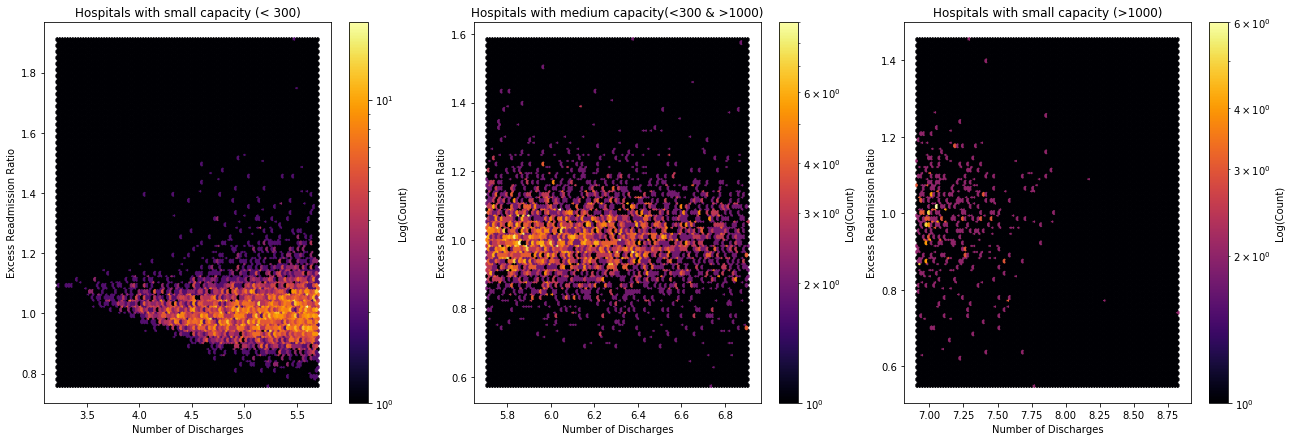

In [25]:
low = df[df['Number of Discharges'] < 300]

high = df[df['Number of Discharges'] > 1000]

med = df[(df['Number of Discharges'] >300) & (df['Number of Discharges'] <1000)]

x_low, y_low = np.log(low['Number of Discharges']), low['Excess Readmission Ratio']

x_med, y_med = np.log(med['Number of Discharges']), med['Excess Readmission Ratio']

x_high, y_high = np.log(high['Number of Discharges']), high['Excess Readmission Ratio']

fig, axs = plt.subplots(ncols=3,  figsize=(12, 7))
fig.subplots_adjust(hspace=0.5, left=0.09, right=1.5)
ax = axs[0]
hb = ax.hexbin(x_low, y_low, cmap='inferno', bins='log')
ax.set_xlabel('Number of Discharges', fontsize=10)
ax.set_ylabel('Excess Readmission Ratio', fontsize=10)
cb = fig.colorbar(hb, ax=ax)
ax.set_title('Hospitals with small capacity (< 300)')
cb.set_label('Log(Count)')

ax = axs[1]
hb = ax.hexbin(x_med, y_med, cmap='inferno', bins='log')
ax.set_xlabel('Number of Discharges', fontsize=10)
ax.set_ylabel('Excess Readmission Ratio', fontsize=10)
cb = fig.colorbar(hb, ax=ax)
ax.set_title('Hospitals with medium capacity(<300 & >1000)')
cb.set_label('Log(Count)')

ax = axs[2]
hb = ax.hexbin(x_high, y_high,cmap='inferno', bins='log')
ax.set_xlabel('Number of Discharges', fontsize=10)
ax.set_ylabel('Excess Readmission Ratio', fontsize=10)
ax.set_title('Hospitals with small capacity (>1000)')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Log(Count)')
